STARTED:      1/16/25

LAST UPDATED: 1/31/25

By Eugene Fong

# GOAL(S)

- EDA on the SN data

# TODO

- make a new conda env?
```
conda update -n base -c conda-forge conda
```

# IMPORTS

In [2]:
import numpy as np
import os
import pandas as pd
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# from scipy.sparse import csr_matrix
# print(ad.__version__)

# LOAD DATA

Actual source:
```
data_dir = '/data/CARD_singlecell/Brain_atlas/SN_Multiome/'

data_dir+'batch{batch}/Multiome/{sample}-ARC/outs/01_{sample}_anndata_object_atac.h5ad', 
```

SN controls table:
```
/vf/users/CARD_singlecell/SN_control_atlas/input/SN_control_samples.csv
```

In [2]:
# # DEFINE FILE PATHS - CHANGE THIS!!!
input_file = '/vf/users/CARD_singlecell/SN_control_atlas/multiome-pipeline/input/SN_control_samples.csv'
# input_file = os.path.join('..', 'input', 'SN_control_samples.csv')

# CHECK
print('input_file =', input_file)

input_file = /vf/users/CARD_singlecell/SN_control_atlas/multiome-pipeline/input/SN_control_samples.csv


In [3]:
# LOAD - matrix file into a Pandas DF
df = pd.read_csv(input_file) 
df

,Unnamed: 0.1,Unnamed: 0,Sample_ID,Homogenizing_batch,Library_batch,Sequencing_batch,Repeated,Use_batch,Age,PMI,Ethnicity,Race,Brain_bank,Short Diagnosis,Sample,Sex
0,0,0,890,1,1,0,0,0,18.2,36.50,Not Hispanic or Latino,Black or African-American,HBCC,Control,890,Male
1,1,1,885,1,1,0,0,0,19.9,21.50,Not Hispanic or Latino,Black or African-American,HBCC,Control,885,Male
2,2,2,1331,15,12,2,0,2,20.2,33.50,Hispanic or Latino,NaN,HBCC,Control,1331,Male
3,3,3,1187,4,4,0,1,0,21.5,25.00,Not Hispanic or Latino,Black or African-American,HBCC,Control,1187,Female
4,4,4,1306,13,11,2,0,2,21.5,15.00,Not Hispanic or Latino,Black or African-American,HBCC,Control,1306,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,114,115,PT13449,36,24,6,0,6,75.0,21.90,NaN,White,Pittsburgh,Control,PT13449,Male
115,115,116,PT13818,36,24,6,0,6,67.0,10.87,NaN,Black or African-American,Pittsburgh,Control,PT13818,Male
116,238,239,SP5568,40,27,7,0,7,65.0,22.40,NaN,Black or African-American,Sepulveda,Control,SP5568,Female
117,239,240,SP5777,40,27,7,0,7,79.0,12.30,NaN,Asian,Sepulveda,Control,SP5777,Female


In [4]:
# DROP - the first 2 columns
df = df.drop(df.columns[:2], axis=1)
df

,Sample_ID,Homogenizing_batch,Library_batch,Sequencing_batch,Repeated,Use_batch,Age,PMI,Ethnicity,Race,Brain_bank,Short Diagnosis,Sample,Sex
0,890,1,1,0,0,0,18.2,36.50,Not Hispanic or Latino,Black or African-American,HBCC,Control,890,Male
1,885,1,1,0,0,0,19.9,21.50,Not Hispanic or Latino,Black or African-American,HBCC,Control,885,Male
2,1331,15,12,2,0,2,20.2,33.50,Hispanic or Latino,NaN,HBCC,Control,1331,Male
3,1187,4,4,0,1,0,21.5,25.00,Not Hispanic or Latino,Black or African-American,HBCC,Control,1187,Female
4,1306,13,11,2,0,2,21.5,15.00,Not Hispanic or Latino,Black or African-American,HBCC,Control,1306,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,PT13449,36,24,6,0,6,75.0,21.90,NaN,White,Pittsburgh,Control,PT13449,Male
115,PT13818,36,24,6,0,6,67.0,10.87,NaN,Black or African-American,Pittsburgh,Control,PT13818,Male
116,SP5568,40,27,7,0,7,65.0,22.40,NaN,Black or African-American,Sepulveda,Control,SP5568,Female
117,SP5777,40,27,7,0,7,79.0,12.30,NaN,Asian,Sepulveda,Control,SP5777,Female


### METADATA

# #? Q) Is there a data dictionary somewhere?


In [5]:
print(f'Shape of DF: \n{df.shape[0]} rows X {df.shape[1]} columns')

Shape of DF: 
119 rows X 14 columns


In [6]:
df.describe()

,Homogenizing_batch,Library_batch,Sequencing_batch,Repeated,Use_batch,Age,PMI
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,118.000000
mean,13.109244,10.243697,1.823529,0.109244,1.857143,54.705042,28.577627
std,8.824840,5.731220,1.660340,0.313264,1.698882,19.161503,15.640584
min,1.000000,1.000000,0.000000,0.000000,0.000000,18.200000,4.000000
25%,7.000000,7.000000,1.000000,0.000000,1.000000,40.050000,15.700000
50%,12.000000,10.000000,2.000000,0.000000,2.000000,57.900000,25.815000
75%,17.000000,13.000000,2.500000,0.000000,2.500000,66.550000,37.750000
max,40.000000,27.000000,7.000000,1.000000,7.000000,97.000000,89.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sample_ID           119 non-null    object 
 1   Homogenizing_batch  119 non-null    int64  
 2   Library_batch       119 non-null    int64  
 3   Sequencing_batch    119 non-null    int64  
 4   Repeated            119 non-null    int64  
 5   Use_batch           119 non-null    int64  
 6   Age                 119 non-null    float64
 7   PMI                 118 non-null    float64
 8   Ethnicity           95 non-null     object 
 9   Race                113 non-null    object 
 10  Brain_bank          119 non-null    object 
 11  Short Diagnosis     119 non-null    object 
 12  Sample              119 non-null    object 
 13  Sex                 119 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 13.1+ KB


In [8]:
df.drop_duplicates()
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in {column}: \n{unique_values}\n')

Unique values in Sample_ID: 
['890' '885' '1331' '1187' '1306' '852' '1908' '1276' '845' '2636' '1657'
 '1604' '2790' '1745' '3147' '1410' '2860' '993' '1405' '1571' '3192'
 '2420' '1898' '1385' '2429' '2943' '1357' '1884' '2781' '2303' '2064'
 '2263' '1390' '1105' '2046' '2074' '1883' '1644' '1179' '1905' '1525'
 '1691' '2552' '1560' '1722' '2453' '2267' '1927' '2543' '2587' '2287'
 '1424' '1431' '859' '1611' '2513' '1832' '2076' '2605' '2304' '894'
 '2927' '1285' '2575' '2703' '51502' '4276' 'HCTZS' '1135' '2454' '1275'
 '55015' '1537' '1654' '1297' '1023' '33987' '6119' '2322' '638682' '1494'
 '2689' '5931' 'BEB21104' '2053' '6038' '2936' 'BEB19019' '6178' '1615'
 '458379' '31556' '2003' '5695' 'S14752' '1613' '3284' '5967' '5769'
 'S15709' '43750' '45135' '2026' '3698' '2539' '831' 'S05135' '3857'
 'HCTZZV' '6118' '6087' 'BEB20008' 'PT13122' 'PT13440' 'PT13449' 'PT13818'
 'SP5568' 'SP5777' 'SP5256']

Unique values in Homogenizing_batch: 
[ 1 15  4 13  9 18 10 14 12 16 11 17  8  2  

### PLOTTING

CHECK - for missing data 1st

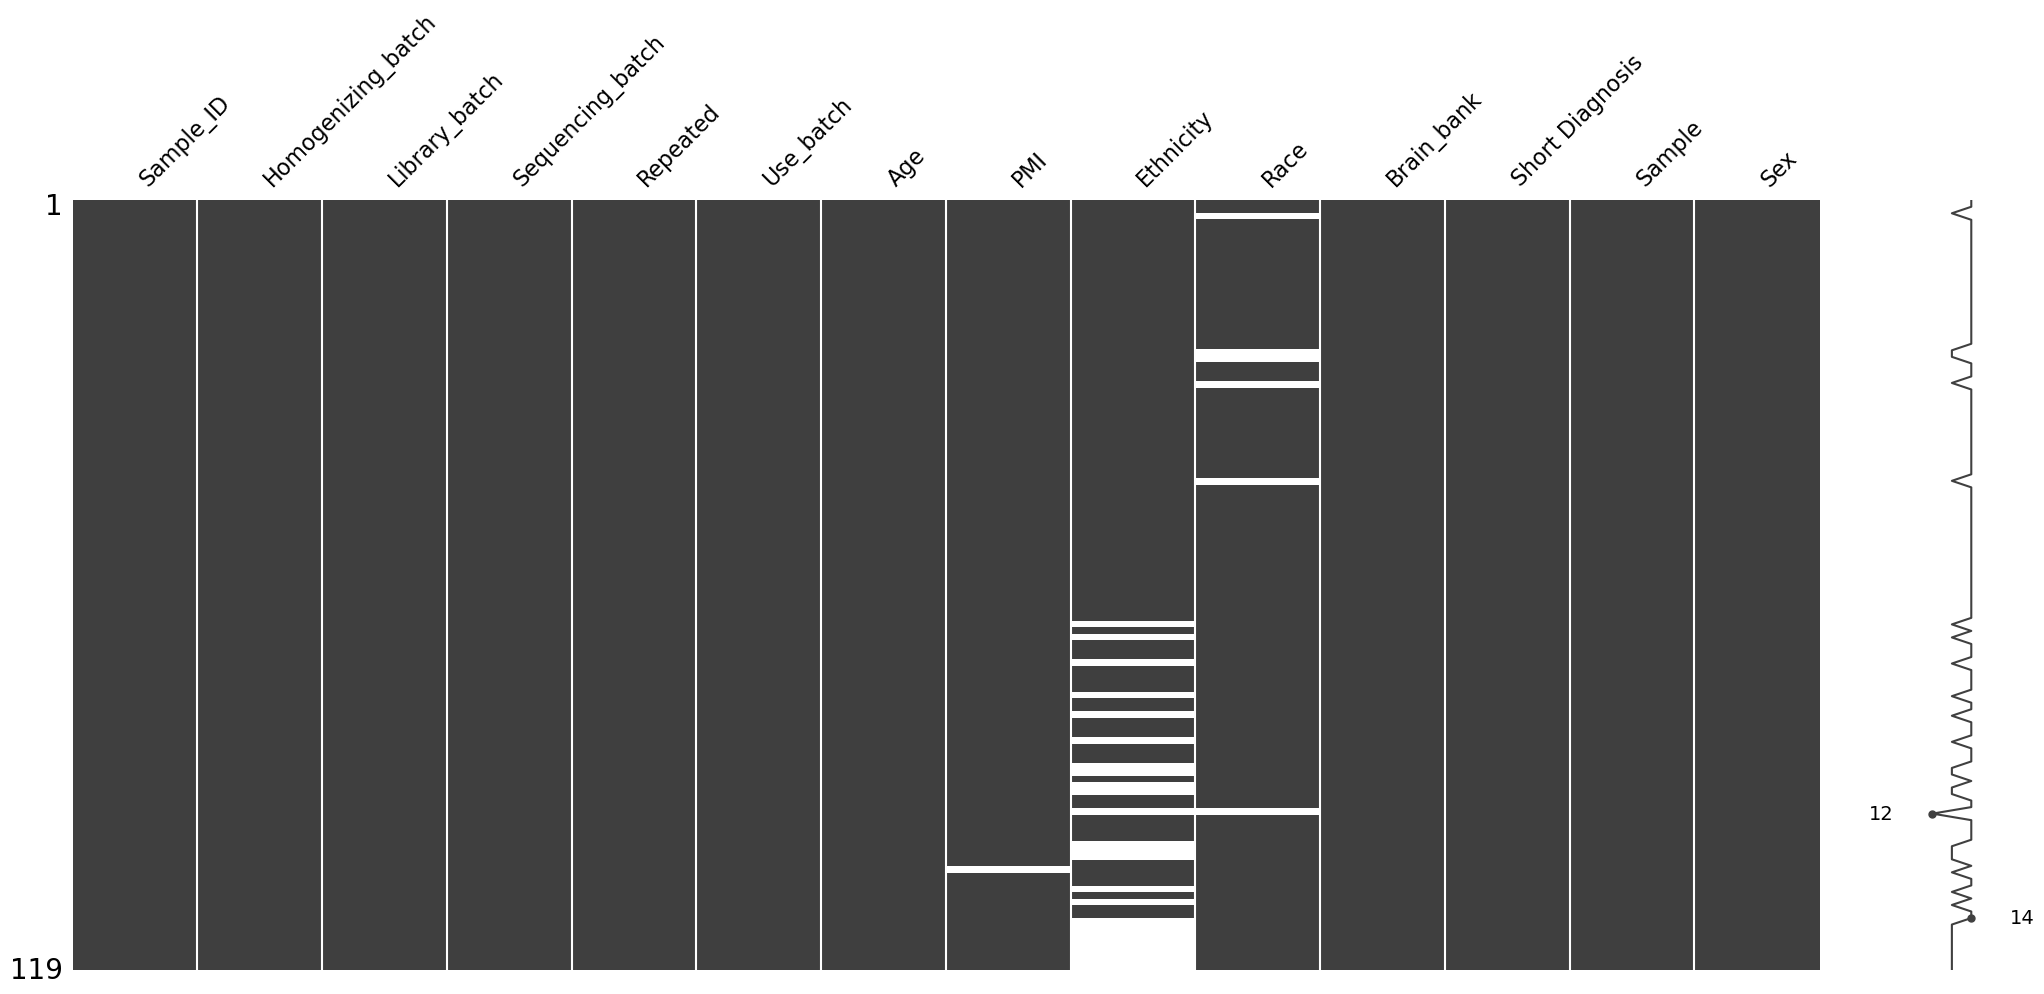

In [9]:
# PLOT - missing data using missingno
msno.matrix(df)
plt.show()

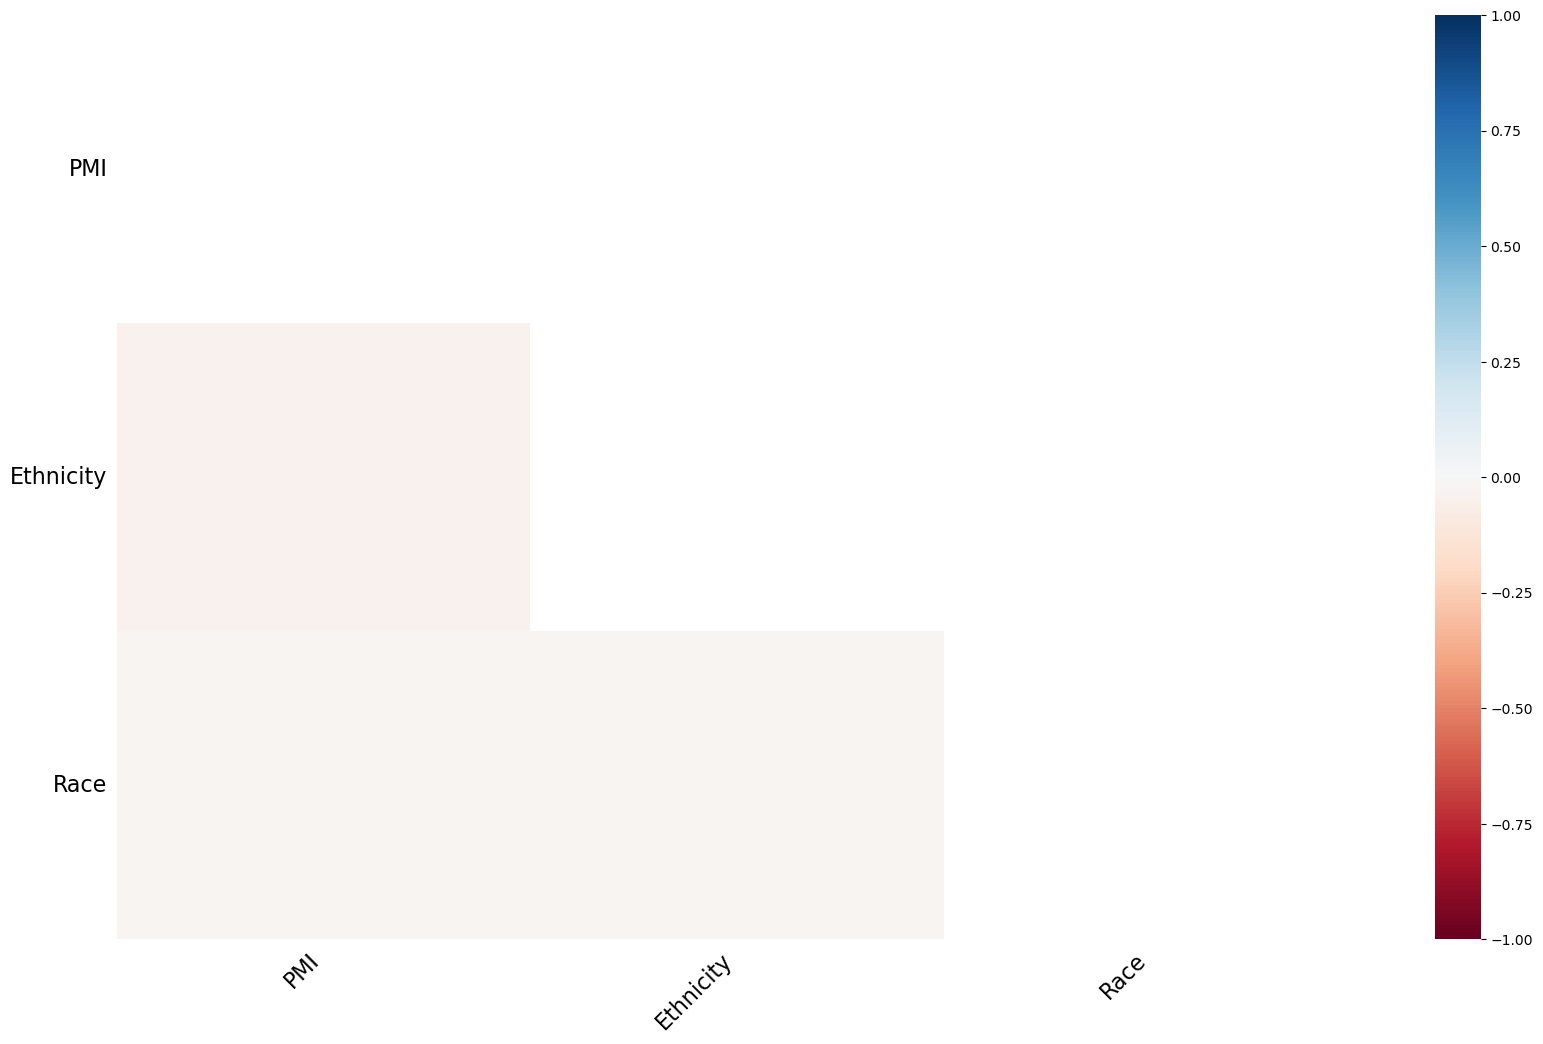

In [10]:
msno.heatmap(df)
plt.show()

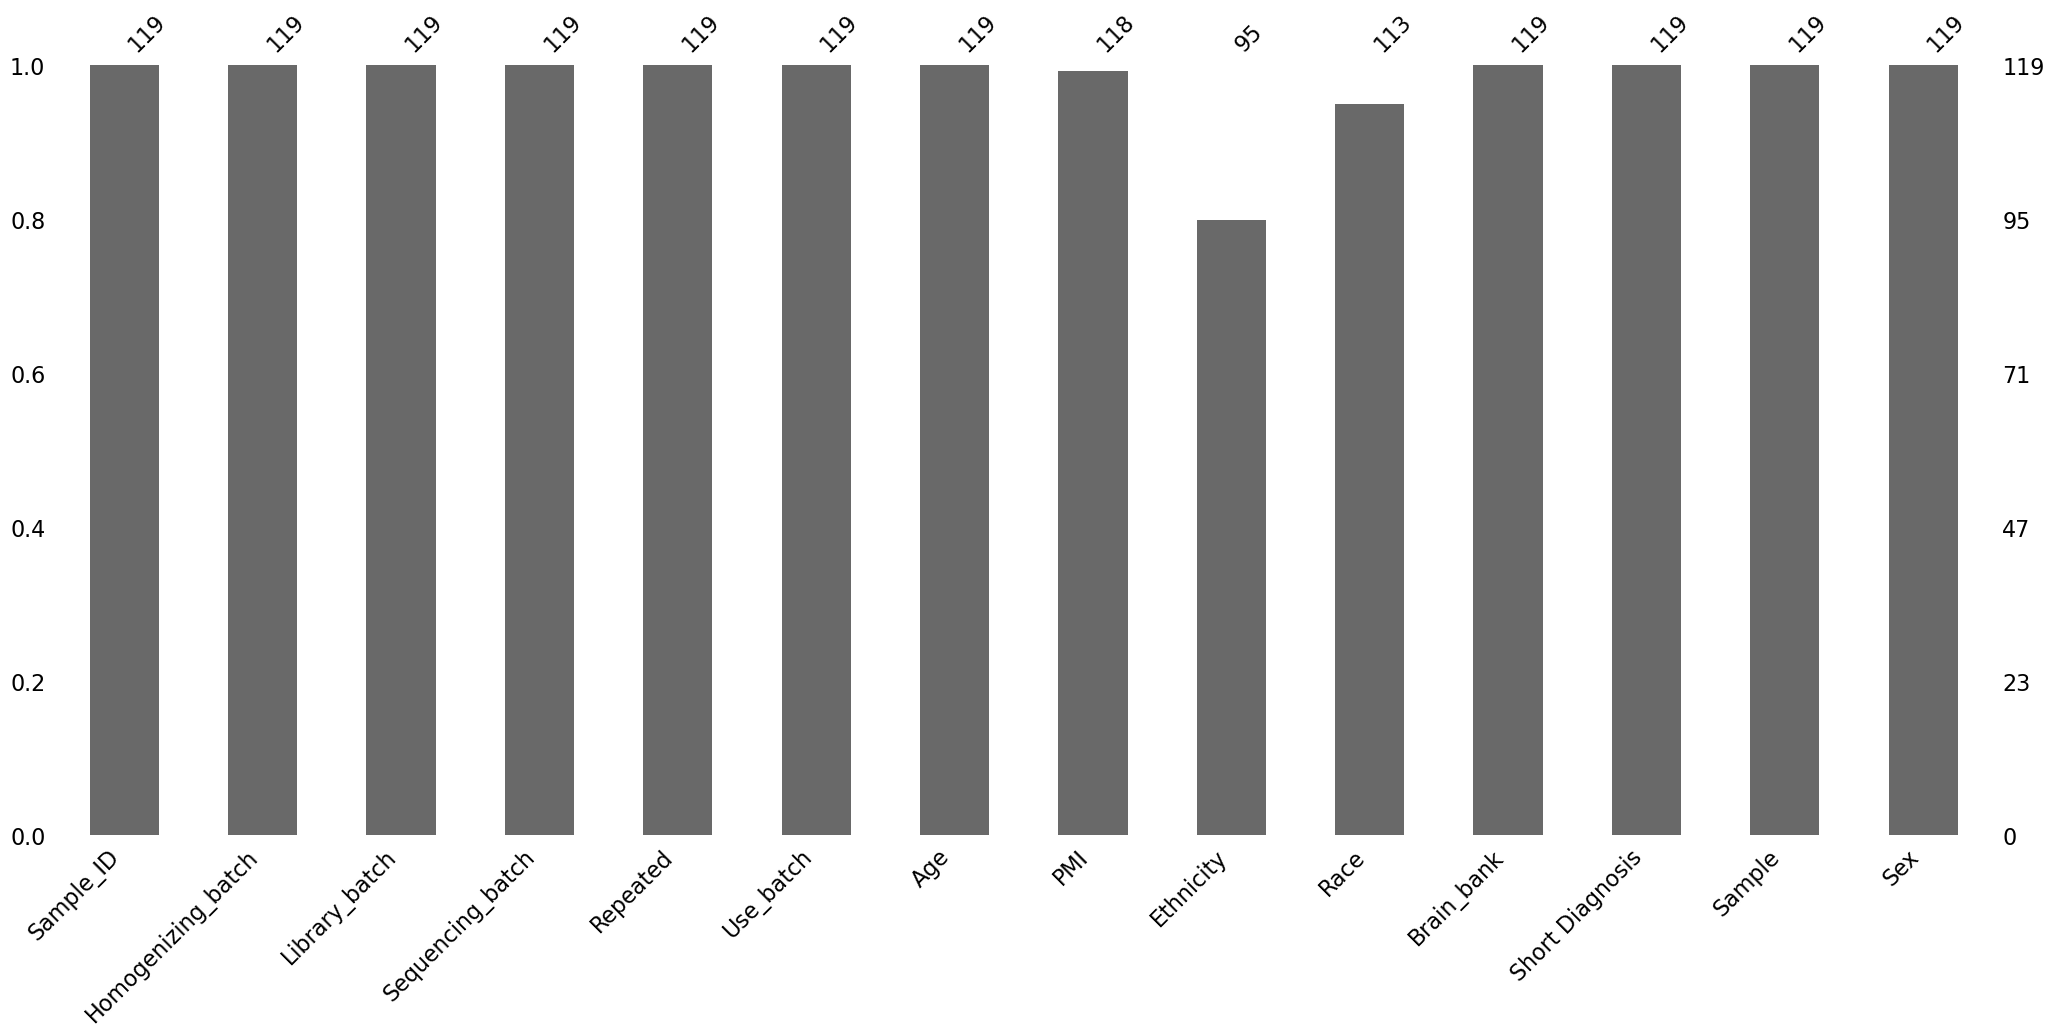

In [11]:
msno.bar(df)
plt.show()

### PLOTTING

Pick some col's to look at

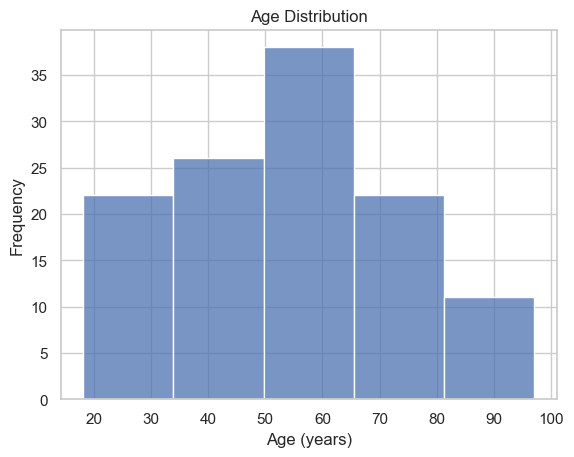

In [12]:
# Set Seaborn style
sns.set(style = 'whitegrid')

column_name = 'Age'

# PLOT - histogram
sns.histplot(df[column_name], bins = 5, kde = False)

# ADD - title and labels
plt.title(f'{column_name} Distribution')
plt.xlabel(f'{column_name} (years)')
plt.ylabel('Frequency')

# SHOW - plot
plt.show()

#? Q) What units are the PMIs?

#? A) Hours

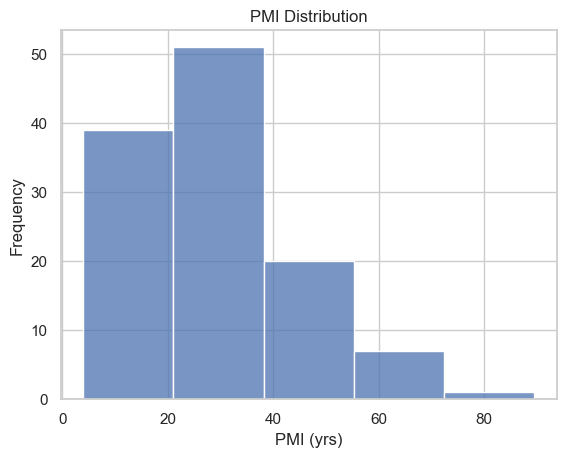

In [13]:
# Set Seaborn style
sns.set(style = 'whitegrid')

column_name = 'PMI'

# PLOT - histogram
sns.histplot(df[column_name], bins = 5, kde = False)

# ADD - title and labels
plt.title(f'{column_name} Distribution')
plt.xlabel(f'{column_name} (yrs)')
plt.ylabel('Frequency')

# SHOW - plot
plt.show()

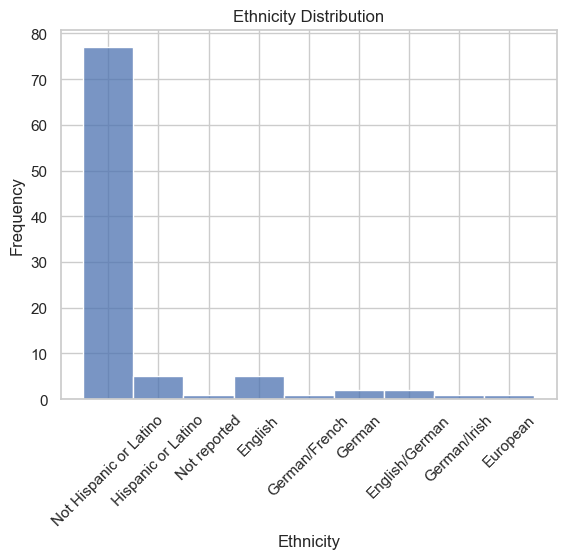

In [14]:
# Set Seaborn style
sns.set(style='whitegrid')

column_name = 'Ethnicity'

# PLOT - histogram
sns.histplot(df[column_name], bins=5, kde=False)

# ADD - title and labels
plt.title(f'{column_name} Distribution')
plt.xlabel(f'{column_name}')
plt.ylabel('Frequency')

# ROTATE - x-axis labels
plt.xticks(rotation = 45)

# SHOW - plot
plt.show()

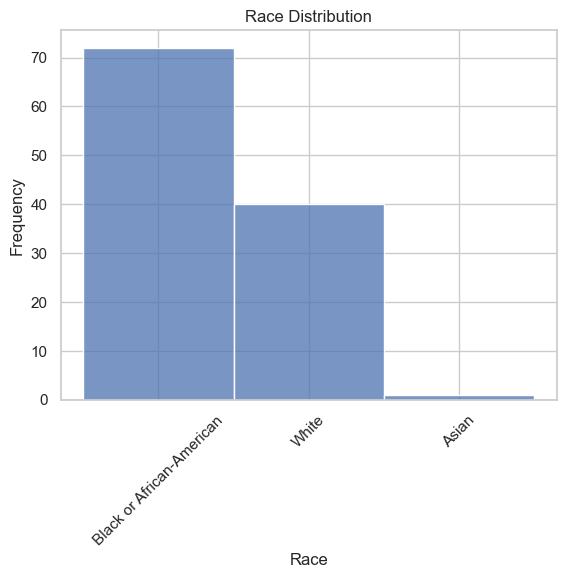

In [15]:
# Set Seaborn style
sns.set(style='whitegrid')

column_name = 'Race'

# PLOT - histogram
sns.histplot(df[column_name], bins=5, kde=False)

# ADD - title and labels
plt.title(f'{column_name} Distribution')
plt.xlabel(f'{column_name}')
plt.ylabel('Frequency')

# ROTATE - x-axis labels
plt.xticks(rotation = 45)

# SHOW - plot
plt.show()

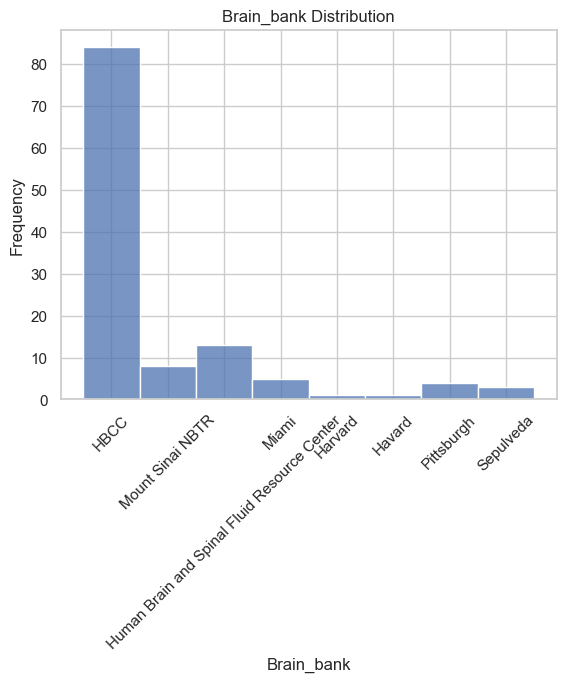

In [16]:
# Set Seaborn style
sns.set(style='whitegrid')

column_name = 'Brain_bank'

# PLOT - histogram
sns.histplot(df[column_name], bins=5, kde=False)

# ADD - title and labels
plt.title(f'{column_name} Distribution')
plt.xlabel(f'{column_name}')
plt.ylabel('Frequency')

# ROTATE - x-axis labels
plt.xticks(rotation = 45)

# SHOW - plot
plt.show()

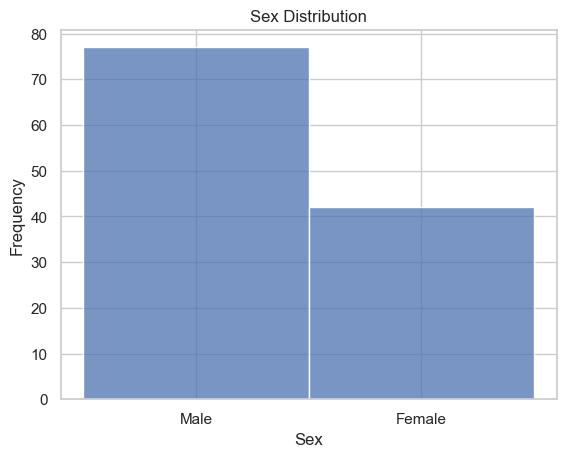

In [17]:
# Set Seaborn style
sns.set(style='whitegrid')

column_name = 'Sex'

# PLOT - histogram
sns.histplot(df[column_name], bins=5, kde=False)

# ADD - title and labels
plt.title(f'{column_name} Distribution')
plt.xlabel(f'{column_name}')
plt.ylabel('Frequency')

# SHOW - plot
plt.show()

In [18]:
#* TODO - change into a pie chart?

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ANNDATA SECTION

SOURCE: [https://anndata.readthedocs.io/en/stable/tutorials/notebooks/getting-started.html](https://anndata.readthedocs.io/en/stable/tutorials/notebooks/getting-started.html)

### DEFINE VARIABLES

In [4]:
input_file = os.path.join('/data/CARD_singlecell/Brain_atlas/SN_Multiome/control_atlas/05_annotated_anndata_rna.h5ad')

### INITIALIZING ANNDATA OBJECT

ADAM: try importing with `sc.read.h5ad`

In [5]:
adata = sc.read_h5ad(input_file)
adata

AnnData object with n_obs × n_vars = 477356 × 35633
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_rb', 'pct_counts_rb', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'cell_barcode', 'batch', 'sex', 'age', 'pmi', 'ethnicity', 'race', 'brain_bank', 'homogenization', 'library', 'seq', 'sample', 'short diagnosis', 'S_score', 'G2M_score', 'phase', 'n_counts', 'atlas_identifier', 'leiden_2', 'leiden', 'leiden_05', 'cell_type'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mt', 'rb'
    uns: 'hvg', 'leiden', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_scvi', 'X_umap', 'ora_estimate', 'ora_pvals'
    layers: 'counts', 'cpm', 'data'
    obsp: 'connectivities', 'distances'

In [22]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_rb,pct_counts_rb,total_counts_mt,pct_counts_mt,doublet_score,cell_barcode,batch,sex,...,short diagnosis,S_score,G2M_score,phase,n_counts,atlas_identifier,leiden_2,leiden,leiden_05,cell_type
GCACGAACAATGAATG-1_890,12047,135894,466,0.342914,25,0.018397,0.108554,GCACGAACAATGAATG-1,0.0,Male,...,Control,-4.616686,-4.344281,G1,1882.529319,GCACGAACAATGAATG-1_890,34,18,12,DaN
CCACAATAGTCAGGCC-1_890,11810,122505,303,0.247337,16,0.013061,0.087155,CCACAATAGTCAGGCC-1,0.0,Male,...,Control,-4.091303,-2.780126,G1,1954.518169,CCACAATAGTCAGGCC-1_890,26,17,11,ExN
CTGCAATAGTGTTGCG-1_890,12369,107476,416,0.387063,95,0.088392,0.130180,CTGCAATAGTGTTGCG-1,0.0,Male,...,Control,-2.962416,-2.134167,G1,1974.325967,CTGCAATAGTGTTGCG-1_890,26,17,11,ExN
GAGTGAGGTCATGAGC-1_890,11701,112072,437,0.389928,24,0.021415,0.120255,GAGTGAGGTCATGAGC-1,0.0,Male,...,Control,-3.701495,-3.039490,G1,1927.224464,GAGTGAGGTCATGAGC-1_890,34,18,12,DaN
GCTCAACCAGCATGTC-1_890,9017,91164,2116,2.321092,1498,1.643192,0.079328,GCTCAACCAGCATGTC-1,0.0,Male,...,Control,-2.371704,-3.103461,G1,1761.063659,GCTCAACCAGCATGTC-1_890,33,22,10,EC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATTTAGGTCATAACCA-1_SP5256,424,579,0,0.000000,0,0.000000,0.064363,ATTTAGGTCATAACCA-1,7.0,Male,...,Control,-0.004104,-0.011658,G1,NaN,ATTTAGGTCATAACCA-1_SP5256,2,0,0,PC
GCTAAGAAGGCAATAG-1_SP5256,464,568,2,0.352113,0,0.000000,0.073468,GCTAAGAAGGCAATAG-1,7.0,Male,...,Control,-0.008208,-0.011658,G1,NaN,GCTAAGAAGGCAATAG-1_SP5256,11,0,0,Oligo
AGCCTAGTCCTCATCA-1_SP5256,512,661,0,0.000000,0,0.000000,0.041814,AGCCTAGTCCTCATCA-1,7.0,Male,...,Control,-0.013680,-0.014249,G1,NaN,AGCCTAGTCCTCATCA-1_SP5256,11,9,0,Oligo
AGCAAGGGTGGATTGC-1_SP5256,413,517,1,0.193424,6,1.160542,0.084414,AGCAAGGGTGGATTGC-1,7.0,Male,...,Control,0.016970,-0.012953,S,NaN,AGCAAGGGTGGATTGC-1_SP5256,2,1,0,PC


### PLOT - using scanpy

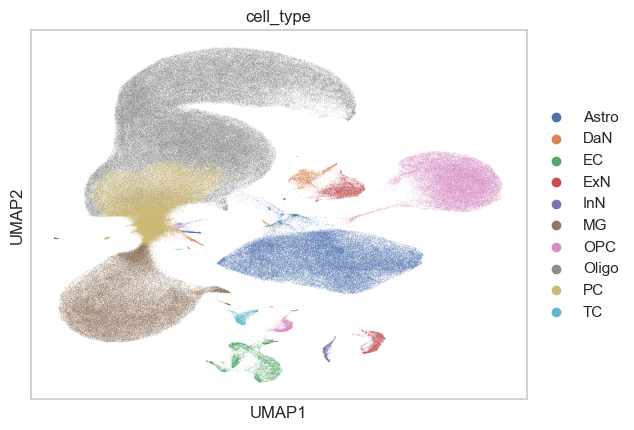

In [23]:
# PLOT - umap by cell type
sc.pl.umap(adata, color='cell_type')

In [24]:
# FILTER - by celltype = T-cells
TC = adata[adata.obs['cell_type'] == 'TC']
TC

View of AnnData object with n_obs × n_vars = 2136 × 35633
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_rb', 'pct_counts_rb', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'cell_barcode', 'batch', 'sex', 'age', 'pmi', 'ethnicity', 'race', 'brain_bank', 'homogenization', 'library', 'seq', 'sample', 'short diagnosis', 'S_score', 'G2M_score', 'phase', 'n_counts', 'atlas_identifier', 'leiden_2', 'leiden', 'leiden_05', 'cell_type'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mt', 'rb'
    uns: 'hvg', 'leiden', 'neighbors', 'umap', 'cell_type_colors'
    obsm: 'X_pca', 'X_scvi', 'X_umap', 'ora_estimate', 'ora_pvals'
    layers: 'counts', 'cpm', 'data'
    obsp: 'connectivities', 'distances'

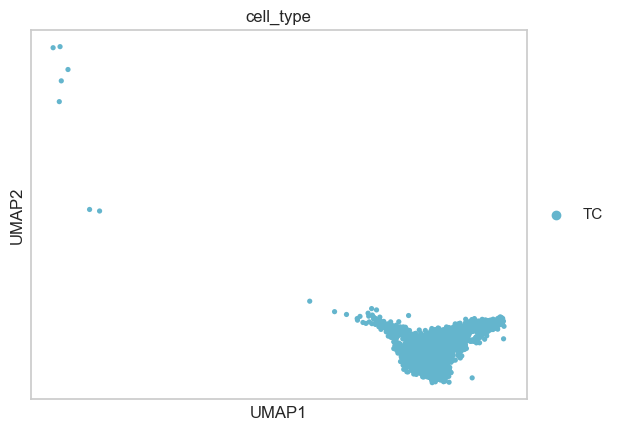

In [25]:
# PLOT - the T-cell filtered data
sc.pl.umap(
    TC, 
    color = 'cell_type')

### FILTERED UMAPS

List of variables to plot:
```
- young VS old (binned)
- 'age' on a continuous spectrum
- 'pmi'
- filter out PC??? --> ask Adam
```

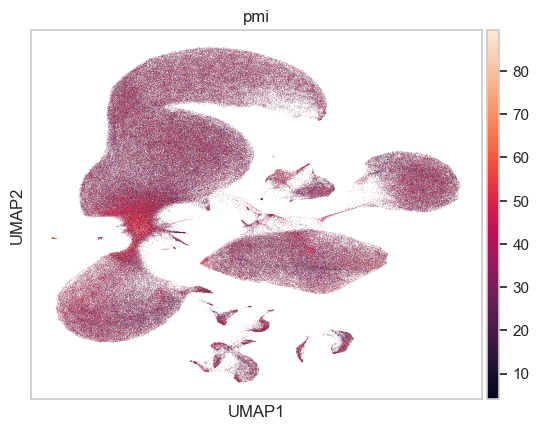

In [26]:
# PLOT - UMAP by PMI
sc.pl.umap(adata, color='pmi')

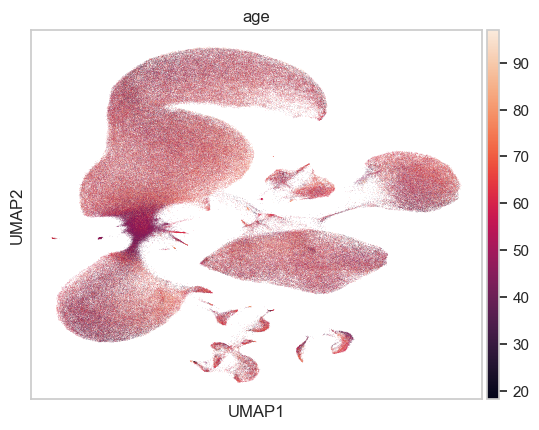

In [27]:
# PLOT - UMAP by age
sc.pl.umap(adata, color='age')

In [28]:
# CALCULATE - Age stats
print('Describe Age column = \n', df.describe()['Age'], '\n')

age_max = df.describe()['Age']['max']
print('age_max =', age_max)

age_min = df.describe()['Age']['min']
print('age_min =', age_min)

print(f'{age_max} - {age_min} = {age_max - age_min}')
print(f'{age_max - age_min} / 2 = {(age_max - age_min) / 2}')
print(f'{age_min} + {(age_max - age_min) / 2} = {age_min + (age_max - age_min) / 2}')

# NOTE - ok to use the 50% row
age_half = df.describe()['Age']['50%']
print('age_half =', age_half)

Describe Age column = 
 count    119.000000
mean      54.705042
std       19.161503
min       18.200000
25%       40.050000
50%       57.900000
75%       66.550000
max       97.000000
Name: Age, dtype: float64 

age_max = 97.0
age_min = 18.2
97.0 - 18.2 = 78.8
78.8 / 2 = 39.4
18.2 + 39.4 = 57.599999999999994
age_half = 57.9


In [29]:
adata

AnnData object with n_obs × n_vars = 477356 × 35633
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_rb', 'pct_counts_rb', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'cell_barcode', 'batch', 'sex', 'age', 'pmi', 'ethnicity', 'race', 'brain_bank', 'homogenization', 'library', 'seq', 'sample', 'short diagnosis', 'S_score', 'G2M_score', 'phase', 'n_counts', 'atlas_identifier', 'leiden_2', 'leiden', 'leiden_05', 'cell_type'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mt', 'rb'
    uns: 'hvg', 'leiden', 'neighbors', 'umap', 'cell_type_colors'
    obsm: 'X_pca', 'X_scvi', 'X_umap', 'ora_estimate', 'ora_pvals'
    layers: 'counts', 'cpm', 'data'
    obsp: 'connectivities', 'distances'

In [30]:
adata.obs['age']

GCACGAACAATGAATG-1_890       18.2
CCACAATAGTCAGGCC-1_890       18.2
CTGCAATAGTGTTGCG-1_890       18.2
GAGTGAGGTCATGAGC-1_890       18.2
GCTCAACCAGCATGTC-1_890       18.2
                             ... 
ATTTAGGTCATAACCA-1_SP5256    61.0
GCTAAGAAGGCAATAG-1_SP5256    61.0
AGCCTAGTCCTCATCA-1_SP5256    61.0
AGCAAGGGTGGATTGC-1_SP5256    61.0
CACATGCCAGTCTATG-1_SP5256    61.0
Name: age, Length: 477356, dtype: float64

In [31]:
age_old = df[df['Age'] >= age_half]['Age'].unique().tolist()
print('age_old =', age_old)
print('\n')
age_young = df[df['Age'] < age_half]['Age'].unique().tolist()
print('age_young =', age_young)

age_old = [57.9, 58.0, 58.1, 58.2, 59.7, 59.9, 60.0, 60.4, 60.6, 60.8, 61.0, 61.2, 62.3, 62.8, 63.0, 63.5, 64.0, 65.0, 65.6, 66.0, 66.1, 67.0, 68.0, 71.8, 72.0, 73.0, 73.9, 74.0, 76.0, 78.0, 80.0, 81.0, 83.0, 83.5, 84.0, 84.2, 85.2, 86.0, 88.0, 93.0, 97.0, 75.0, 79.0]


age_young = [18.2, 19.9, 20.2, 21.5, 22.1, 23.6, 24.3, 24.8, 24.9, 25.8, 27.2, 27.3, 27.6, 28.4, 29.8, 30.3, 30.5, 31.5, 31.6, 33.2, 33.8, 34.8, 35.6, 36.1, 36.8, 38.1, 38.5, 38.8, 39.8, 40.3, 42.7, 44.2, 44.7, 44.8, 45.2, 45.3, 45.4, 46.0, 46.1, 46.6, 46.9, 48.5, 48.6, 49.4, 49.7, 50.5, 50.6, 50.9, 51.6, 51.7, 52.2, 53.6, 54.5, 54.9, 56.5, 57.4]


In [32]:
adata.obs['age_old'] = adata.obs['age'] >= age_half
adata.obs['age_old']

GCACGAACAATGAATG-1_890       False
CCACAATAGTCAGGCC-1_890       False
CTGCAATAGTGTTGCG-1_890       False
GAGTGAGGTCATGAGC-1_890       False
GCTCAACCAGCATGTC-1_890       False
                             ...  
ATTTAGGTCATAACCA-1_SP5256     True
GCTAAGAAGGCAATAG-1_SP5256     True
AGCCTAGTCCTCATCA-1_SP5256     True
AGCAAGGGTGGATTGC-1_SP5256     True
CACATGCCAGTCTATG-1_SP5256     True
Name: age_old, Length: 477356, dtype: bool

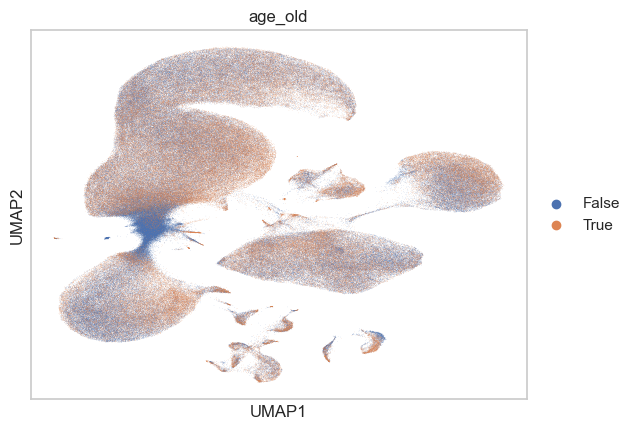

In [33]:
# PLOT - UMAP of old VS young ages
sc.pl.umap(
    adata, 
    color = 'age_old'
    )

In [34]:
adata.obs['age_bin'] = np.where(adata.obs['age_old'], f'old (>= {age_half})', f'young (< {age_half})')
adata.obs['age_bin']

GCACGAACAATGAATG-1_890       young (< 57.9)
CCACAATAGTCAGGCC-1_890       young (< 57.9)
CTGCAATAGTGTTGCG-1_890       young (< 57.9)
GAGTGAGGTCATGAGC-1_890       young (< 57.9)
GCTCAACCAGCATGTC-1_890       young (< 57.9)
                                  ...      
ATTTAGGTCATAACCA-1_SP5256     old (>= 57.9)
GCTAAGAAGGCAATAG-1_SP5256     old (>= 57.9)
AGCCTAGTCCTCATCA-1_SP5256     old (>= 57.9)
AGCAAGGGTGGATTGC-1_SP5256     old (>= 57.9)
CACATGCCAGTCTATG-1_SP5256     old (>= 57.9)
Name: age_bin, Length: 477356, dtype: object

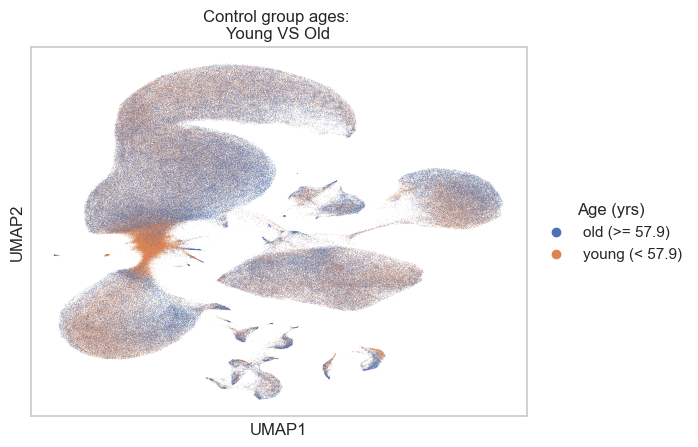

In [45]:
# PLOT - Customize UMAP of old VS young ages
fig = sc.pl.umap(
    adata, 
    color = 'age_bin', 
    title = 'Control group ages: \nYoung VS Old',
    return_fig = True
    )
ax = fig.axes[0]
ax.legend_.set_title('Age (yrs)')

In [ ]:
# Define a function to check for existing dir's and create them if missing
def my_makedirs(path):
    """
    Provide a full file path, this will grab just the parent directory and check if it exists, if not, it will create it.
    """
    # Get the parent directory path
    path = os.path.dirname(path)
    
    # If-else logic to check if they exist, if not, create the directory
    if not os.path.isdir(path):
        os.makedirs(path)
        print(f"Created: {path}")
    else:
        print(f"{path} folder is already there")

# Define output file path for my testing, base on the original file name
output_file = os.path.join('output', os.path.basename(input_file).replace('.h5ad', '-ef.h5ad'))
print('output_file =', output_file)

# Call function to check for or create that path to the output file location
my_makedirs(output_file)

output_file = output/05_annotated_anndata_rna-ef.h5ad
output folder is already there


In [ ]:
# Save the AnnData object
adata.write_h5ad(
    filename = output_file, 
    compression = 'gzip'
    )

output_file = 05_annotated_anndata_rna-ef.h5ad


In [48]:
# RELOAD - my saved AnnData object
adata = sc.read_h5ad(output_file)
adata

AnnData object with n_obs × n_vars = 477356 × 35633
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_rb', 'pct_counts_rb', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'cell_barcode', 'batch', 'sex', 'age', 'pmi', 'ethnicity', 'race', 'brain_bank', 'homogenization', 'library', 'seq', 'sample', 'short diagnosis', 'S_score', 'G2M_score', 'phase', 'n_counts', 'atlas_identifier', 'leiden_2', 'leiden', 'leiden_05', 'cell_type', 'age_old', 'age_bin', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log1p_total_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mt', 'rb', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_t

### QC

In [36]:
# Mitochondrial genes "MT-" for human
adata.var['mt'] = adata.var_names.str.startswith('MT-')

# Ribosomal genes
adata.var['ribo'] = adata.var_names.str.startswith (('RPS', 'PRL'))

In [37]:
sc.pp.calculate_qc_metrics(
    adata,
    qc_vars = ['mt', 'ribo'],
    inplace = True,
    log1p = True
)

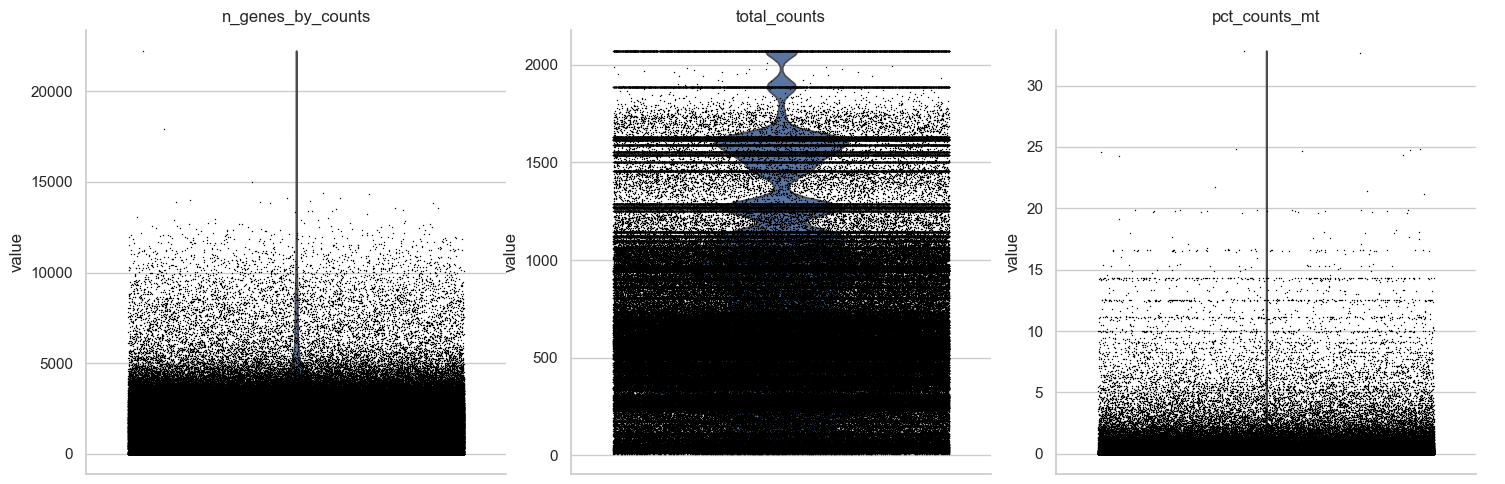

In [38]:
# PLOT - violin plot of QC metrics
sc.pl.violin(
    adata,
    ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
    jitter = 0.4,
    multi_panel = True,
)

Useful to consider QC metrics jointly by inspecting a scatter plot colored by `pct_counts_mt`

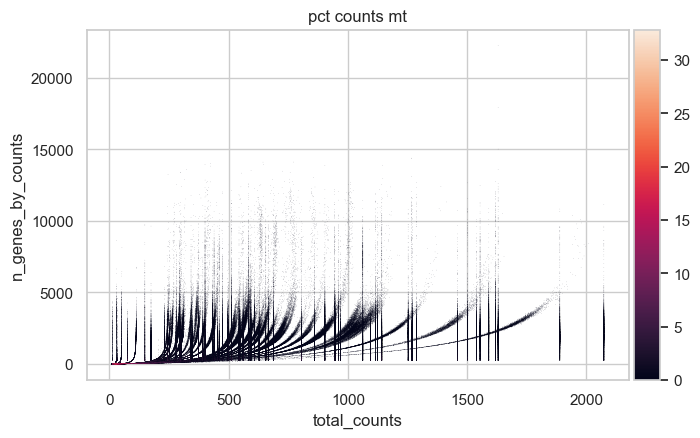

In [39]:
sc.pl.scatter(
    adata,
    'total_counts',
    'n_genes_by_counts',
    color = 'pct_counts_mt'
)

# FILTER??? - Check snakemake rules 1st

In [40]:
# sc.pp.filter_cells(adata, min_genes = 100)

# #? Q) How to check this?

In [41]:
# # CHECK - starting # of genes
# print(f'# of genes pre-filtering: {adata.n_vars}')

# # Remove genes detected in < 3 cells (along w/the 0 count genes)
# sc.pp.filter_genes(adata, min_cells = 3)

# # CHECK - remaining genes
# print(f'# of genes post-filtering: {adata.n_vars}')

### DIFFERENTIALLY-EXPRESSED (DE) GENES AS MARKERS

Can also calc marker genes/cluster and then look up whether we can link those marker genes to known biology (ie. cell types and/or states). Can be done using simple stat tests (ie. Wilcoxon and t-test) for each cluster VS the rest.

In [42]:
# for res in [0.02, 0.5, 2.0]:
#     sc.tl.leiden(
#         adata,
#         key_added = f'leiden_res_{res:4.2f}',
#         resolution = res,
#         flavor = 'igraph'
#     )

In [43]:
# #! WARNING: It seems you use rank_genes_groups on the raw count data. Please logarithmize your data before calling rank_genes_groups.
# # 32 mins

# # Obtain cluster-specific DE genes
# sc.tl.rank_genes_groups(
#     adata,
#     groupby = 'leiden_res_0.50',
#     method = 'wilcoxon'
# )

In [44]:
# sc.get.rank_genes_groups_df(
#     adata,
#     group = '7'
# ).head(5)